# Tester code for calculating all paths between nodes
Based on [python.org code](https://www.python.org/doc/essays/graphs/)

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# creating a test bi-directional node network
graph = {'A': ['B', 'C'],
             'B': ['A', 'C', 'D', 'G'],
             'C': ['A', 'B', 'D'],
             'D': ['B', 'C'],
             'E': ['F'],
             'F': ['C', 'E', 'G'],
            'G': ['B', 'F']}

In [2]:
graph

{'A': ['B', 'C'],
 'B': ['A', 'C', 'D', 'G'],
 'C': ['A', 'B', 'D'],
 'D': ['B', 'C'],
 'E': ['F'],
 'F': ['C', 'E', 'G'],
 'G': ['B', 'F']}

In [3]:
# Basic version, copied directly from https://www.python.org/doc/essays/graphs/ (with a Python > 3 fix) 
def find_all_paths(graph, start, end, path=[]):
    path = path + [start]
    
    if start == end:
        return [path]
    
    if start not in graph:
        return []
    
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [12]:
# Adding in max_len param, which is the maximum number of edges (connections) allowed.

def find_all_paths(graph, start, end, max_len, path=[]):
    
    curr_len = len(path)
    
    path = path + [start]
    
    if start == end:
        return [path]
    
    if start not in graph:
        return []
    
    paths = []
    for node in graph[start]:
        if curr_len < max_len:
            if node not in path:
                newpaths = find_all_paths(graph, node, end, max_len, path)
                for newpath in newpaths:
                    paths.append(newpath)
        else:
            break
    return paths

In [13]:
find_all_paths(graph, 'A', 'D', 15)

[['A', 'B', 'C', 'D'],
 ['A', 'B', 'D'],
 ['A', 'B', 'G', 'F', 'C', 'D'],
 ['A', 'C', 'B', 'D'],
 ['A', 'C', 'D']]

In [14]:
find_all_paths(graph, 'A', 'D', 3)

[['A', 'B', 'C', 'D'], ['A', 'B', 'D'], ['A', 'C', 'B', 'D'], ['A', 'C', 'D']]

In [15]:
find_all_paths(graph, 'A', 'D', 2)

[['A', 'B', 'D'], ['A', 'C', 'D']]

In [16]:
find_all_paths(graph, 'A', 'D', 1)

[]

In [17]:
%timeit find_all_paths(graph, 'A', 'D', 15)

10.9 µs ± 307 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
%timeit find_all_paths(graph, 'A', 'D', 3)

6.84 µs ± 151 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [19]:
%timeit find_all_paths(graph, 'A', 'D', 0)

392 ns ± 11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [20]:
# Create a much bigger dict to test timing...
# letters = string.ascii_letters
letters = pd.Series(list(string.ascii_letters))


graph2 = {}
for letter in letters:
    num_cnnxns = np.random.randint(1, len(letters))
    
    graph2[letter] = letters.sample(n=num_cnnxns).get_values()

In [21]:
print(len(graph2), ' nodes & ', sum(map(len, graph2.values())), ' edges')
find_all_paths(graph2, 'a', 'd', 5)

52  nodes &  1309  edges


[['a', 'F', 'C', 'g', 'G', 'd'],
 ['a', 'F', 'C', 'g', 'b', 'd'],
 ['a', 'F', 'C', 'g', 'J', 'd'],
 ['a', 'F', 'C', 'g', 'p', 'd'],
 ['a', 'F', 'C', 'g', 'K', 'd'],
 ['a', 'F', 'C', 'g', 'Y', 'd'],
 ['a', 'F', 'C', 'g', 'B', 'd'],
 ['a', 'F', 'C', 'g', 'd'],
 ['a', 'F', 'C', 'g', 'T', 'd'],
 ['a', 'F', 'C', 'g', 'n', 'd'],
 ['a', 'F', 'C', 'g', 'H', 'd'],
 ['a', 'F', 'C', 'g', 'z', 'd'],
 ['a', 'F', 'C', 'g', 'u', 'd'],
 ['a', 'F', 'C', 'g', 'k', 'd'],
 ['a', 'F', 'C', 'g', 'N', 'd'],
 ['a', 'F', 'C', 'g', 'M', 'd'],
 ['a', 'F', 'C', 'g', 'l', 'd'],
 ['a', 'F', 'C', 'g', 'o', 'd'],
 ['a', 'F', 'C', 'g', 'h', 'd'],
 ['a', 'F', 'C', 'g', 'P', 'd'],
 ['a', 'F', 'C', 'g', 'w', 'd'],
 ['a', 'F', 'C', 'S', 'p', 'd'],
 ['a', 'F', 'C', 'S', 'G', 'd'],
 ['a', 'F', 'C', 'S', 'g', 'd'],
 ['a', 'F', 'C', 'S', 'J', 'd'],
 ['a', 'F', 'C', 'S', 'h', 'd'],
 ['a', 'F', 'C', 'S', 'u', 'd'],
 ['a', 'F', 'C', 'S', 'T', 'd'],
 ['a', 'F', 'C', 'S', 'N', 'd'],
 ['a', 'F', 'C', 'S', 'k', 'd'],
 ['a', 'F', 'C'

In [24]:
%timeit find_all_paths(graph2, 'a', 'd', 2)

399 µs ± 21.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
%timeit find_all_paths(graph2, 'a', 'd', 3)

9.15 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
%timeit find_all_paths(graph2, 'a', 'd', 5)

4.95 s ± 86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit find_all_paths(graph2, 'a', 'd', 6)

1min 50s ± 2.67 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
# Initial network
times = {'time': [452e-6, 251e-3, 0],
        'max_nodes': [3,5,7]}
# reseeded new network
times = {'time': [399e-6, 9.15e-3, 4.95, 110],
        'max_nodes': [2,3,5,6]}
times

{'max_nodes': [2, 3, 5, 6], 'time': [0.000399, 0.00915, 4.95, 110]}

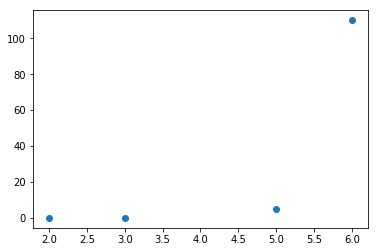

In [30]:
# quick scatter plot
plt.scatter(times['max_nodes'], times['time'])
plt.show()